# ELEC 677 – Network Science and Analytics – Homework 0

Due: 8/30/2018

*On my honor, I have neither given nor received any unauthorized aid on this assignment.*

Daniel LeJeune, S01276871
$\newcommand{\grenewcommand}{\renewcommand} \newcommand{\gnewcommand}{\newcommand}$ 

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.style.use('notebook')

## Problem 0.1

### Part 0.1.1

Exploiting the symmetry of the problem, it is clear that the answer is $3/5$, since all shots are equally likely and independent. The probability that any particular shot is made given that $3$ of the $5$ were made is $3/5$.

We can also show the answer another way. Let $\grenewcommand{\vec}[1]{\mathbf{#1}} \gnewcommand{\x}{\vec{x}} \gnewcommand{\y}{\vec{y}} \gnewcommand{\z}{\vec{z}} \gnewcommand{\R}{\mathbb{R}} \gnewcommand{\T}{\mathsf{T}} \gnewcommand{\E}{\mathbb{E}} \gnewcommand{\tr}{\mathrm{tr}}X_i = \mathbb{1}_{\{\text{the }i^{th}\text{ shot is made}\}}$. We want to know $P\left(X_1 = 1 \big{|} \sum_{i=1}^5 X_i = 3\right)$. Applying Bayes' rule,

\begin{align*}
    P\left(X_1 = 1 \bigg{|} \sum_{i=1}^5 X_i = 3\right) &= \frac{P\left(\sum_{i=1}^5 X_i = 3 \big{|} X_1 = 1\right) P(X_1 = 1)}{P\left(\sum_{i=1}^5 X_i = 3\right)} \\
    &= \frac{P\left(\sum_{i=2}^5 X_i = 2\right) p}{\binom{5}{3}p^3(1-p)^2} \\
    &= \frac{\binom{4}{2} p^2 (1-p)^2 p}{\binom{5}{3}p^3(1-p)^2} \\
    &= \frac{3}{5}
\end{align*}

### Part 0.1.2

In any scenario in which Alice survives, an even number of shots were fired and missed before she succeeds against Bob. Let $A$ denote the event in which Alice survives (and $B$ denote the event in which Bob survives). Then 

\begin{align*}
    P(A) &= p \sum_{k=0}^\infty (1-p)^{2k} \\
    &= \frac{p}{1 - (1-p)^2} \\
    &= \frac{p}{2p - p^2} \\
    &= \frac{1}{2 - p}.
\end{align*}

The difference of probabilities between Alice's survival and Bob's survival is

\begin{align*}
    P(A) - P(B) &= P(A) - (1 - P(A)) \\
    &= 2P(A) - 1 \\
    &= \frac{2}{2 - p} - 1 \\
    &= \frac{p}{2 - p}.
\end{align*}

### Part 0.1.3

Let $X_{(1)}, X_{(2)}, X_{(3)}$ be the order statistics of the numbers chosen yesterday, and let $Y_1, Y_2, Y_3$ be the numbers chosen today. Then we can decompose the desired probability using the chain rule:

\begin{align*}
    &P(\{\text{smallest two numbers are the same yesterday and today}\})\\
    &= P(\exists Y_i : Y_i = X_{(1)} \land \exists Y_i : Y_i = X_{(2)} \land \exists Y_i : Y_i > X_{(2)}) \\
    &= P(\exists Y_i : Y_i = X_{(1)}) P(\exists Y_i : Y_i = X_{(2)} | \exists Y_i : Y_i = X_{(1)})
    P(\exists Y_i : Y_i > X_{(2)} | \exists Y_i : Y_i = X_{(1)} \land \exists Y_i : Y_i = X_{(2)})
\end{align*}

These three probabilities can be computed straightforwardly. For the first, it is simply the probability that one of the three numbers chosen today is equal to a particular number chosen yesterday, so

$$
    P(\exists Y_i : Y_i = X_{(1)}) = \frac{3}{15}.
$$

The second is similar, but instead it is the probability that one of the two remaining numbers (since we exclude the one that was equal to $X_{(1)}$) is equal to $X_{(2)}$, and we have one fewer number to choose from since one has already been taken:

$$
    P(\exists Y_i : Y_i = X_{(2)} | \exists Y_i : Y_i = X_{(1)}) = \frac{2}{14}.
$$

The last one is the most involved, but if we define a new uniform random variable on $[15]$ named $Y$, then using the distinctness of the numbers chosen today, probability is equivalent to

\begin{align*}
    P(Y > X_{(2)} | Y \neq X_{(1)} \land Y \neq X_{(2)})
    &= \sum_{k=1}^{15} P(X_{(2)} = k) P(Y > X_{(2)} | X_{(2)} =k \land Y \neq X_{(1)} \land Y \neq X_{(2)}) \\
    &= \sum_{k=1}^{15} P(X_{(2)} = k) \frac{15 - k}{13} \\
    &= \frac{1}{13} \left(15 - \sum_{k=1}^{15} k P(X_{(2)} = k) \right) \\
    &= \frac{15 - \E[X_{(2)}]}{13} \\
    &= \frac{7}{13}.
\end{align*}

The last equality comes from the symmetry of the problem, that the expectation of the median number must be the median of the population (since the median is both the second-highest and second-lowest of the three numbers, it must be equally distant from the lower and upper bondary numbers), which is $8$. Putting this all together, 

\begin{align*}
    P(\{\text{smallest two numbers are the same yesterday and today}\}) &= \frac{3}{15} \frac{2}{14} \frac{7}{13} \\
    &= \frac{1}{5} \frac{1}{7} \frac{7}{13} \\
    &= \frac{1}{65}. \\
\end{align*}

Monte Carlo simulation corroborates this result:

In [3]:
n_numbers = 15
n_trials = 10**6

numbers = list(range(n_numbers))
successes = 0

for _ in range(n_trials):
    day1 = sorted(random.sample(numbers, 3))
    day2 = sorted(random.sample(numbers, 3))
    if day1[:2] == day2[:2]:
        successes += 1

print('analytical probability: %g' % (1 / 65))
print('empirical probability: %g' % (successes / n_trials))

analytical probability: 0.0153846
empirical probability: 0.015398


### Part 0.1.4

#### Part a)

Yes, $\hat{\mu}_1$ is unbiased, since $\E[X_1] = \mu$. It is not consistent, since $X_1$ does not converge to anything as $N \to \infty$.

#### Part b)

Yes, $\hat{\mu}_2$ is unbiased, since $\frac{1}{N} \sum_{i=1}^N \E[X_i] = \frac{1}{N} N \mu = \mu$. It is also consistent by the weak law of large numbers, since it is a sample of average of $i.i.d.$ random variables and therefore converges in probability to $\mu$ as $N \to \infty$.

## Problem 0.2

### Part 0.2.1

Since $\x \in \mathrm{Null}(\vec{A})$, $\vec{A}\x = \vec{0}$. Any $\y$ in the range of $\vec{A}^T$ has the form $\y = \vec{A}^T \vec{c}$. Then,

\begin{align*}
    \y^T \x &= \vec{c}^T \vec{A} \x \\
    &= \vec{c}^T \vec{0} \\
    &= 0,
\end{align*}

So $\x$ and $\y$ are orthogonal.

### Part 0.2.2

#### Part a)

The columns of $\vec{A}$ are linearly independent, and $\vec{A}$ has full column rank.

#### Part b)

Clearly, if $\x = \vec{0}$, then $\vec{A}^T \vec{A} \x = \vec{0}$. If $\x \neq \vec{0}$, then $\vec{A}\x \neq \vec{0}$. Let $\y = \vec{A} \x$. From part 0.2.1, $\y$ is orthogonal any vector in $\mathrm{Null}(\vec{A}^T)$, so since $\y \neq \vec{0}$ we must have that $\y \notin \mathrm{Null}(\vec{A}^T)$. As such, $\vec{A}^T \y \neq \vec{0}$, so if $\x \neq \vec{0}$, then $\vec{A}^T \vec{A} \x \neq \vec{0}$.

### Part 0.2.3

#### Part a)

The rank of $[\vec{A} \; \vec{B}]$ will be no less than $\max \{\mathrm{rank}(\vec{A}), \mathrm{rank}(\vec{B})\}$ and no more than $\mathrm{rank}(\vec{A}) + \mathrm{rank}(\vec{B})$. The lower bound is attained with equality when the column space of either $\vec{A}$ or $\vec{B}$ is a subspace of the other (since the column space of the concatenation will be the same as the larger column space), and the upper bound is attained with equality when the column spaces are orthogonal.

#### Part b)

In this case the rank of $[\vec{A} \; \vec{B}]$ is equal to $\mathrm{rank}(\vec{A})$, since the column space of $\vec{A}^2$ is a subspace of the column space of $\vec{A}$.

#### Part c)

$\mathrm{Null}(\vec{A})$ has dimension $n - r$, and $\mathrm{Null}([\vec{A} \; \vec{A}])$ has dimension $2n - r$. These can be seen by the rank-nullity theorem, since the rank of both matrices is $r$ (for the concatenation, this follows from the previous answers).

### Part 0.2.4

To determine the eigenvalues, we can consider the determinant of $\vec{A} - \lambda \vec{I}$. If we compute the determinant via cofactor expansion along the first row, we have that the determinant is equal to $(a_{n-1} - \lambda)C_{1,1} + \sum_{j=2}^n a_{n-j} C_{1,j}$. Each cofactor $C_{1,j} = (-1)^{1+j} M_{1,j}$, where the minor $M_{1,j}$ is the determinant of a submatrix with $j-1$ occurences of the value $1$ along the diagonal followed by $n-j$ occurences of $(-\lambda)$. The determinants of these submatrices are simple to compute via cofactor expansion: as long as there is a $1$ in the upper-left corner of the submatrix, the rest of the first column is all $0$, so we can drop the first row and column of the submatrix without changing the determinant. At the point that all of the diagonal elements remaining are the $(-\lambda)$ values, the matrix is lower-diagonal,  which makes $M_{1,j} = (-\lambda)^{n-j}$. Thus,

\begin{align*}
    \det(\vec{A} - \lambda \vec{I}) &= (a_{n-1} - \lambda)C_{1,1} + \sum_{j=2}^n a_{n-j} C_{1,j} \\
    &= (-\lambda)(-\lambda)^{n-1} + \sum_{j=1}^n a_{n-j} (-1)^{1+j} (-\lambda)^{n-j} \\
    &= (-\lambda)^n + (-1)^{1+n} \sum_{j=1}^n a_{n-j} \lambda^{n-j} \\
    &= (-1)^{n} \left(\lambda^n - \sum_{k=0}^{n-1} a_k \lambda^k \right). \\
\end{align*}

So, the eigenvalues are the roots of the polynomial $\lambda^n - \sum_{k=0}^{n-1} a_k \lambda^k$. We can find the eigenvectors by solving ${(\vec{A}-\lambda \vec{I})\x = \vec{0}}$. The last $n-1$ equations give that $x_j = \lambda x_{j+1}$ for $j < n$, so $x_j = \lambda^{n-j} x_n$ for $j < n$. Since eigenvectors are unique up to a scale factor, we can fix $x_n = 1$, yielding that the eigenvector corresponding to an eigenvalue $\lambda$ is $(\lambda^{n-1}, \lambda^{n-2}, \ldots, \lambda, 1)$.

In the case that $a_i = 0$ for $i > 0$ and $a_0 = 1$, the eigenvalues are the solutions to $\lambda^n = 1$, which are the complex $n^{th}$ roots of 1. That is, $\lambda_k = \exp \{-i 2 \pi k / n\}$ for $k \in [n]$.

## Problem 0.3

### Part 0.3.1

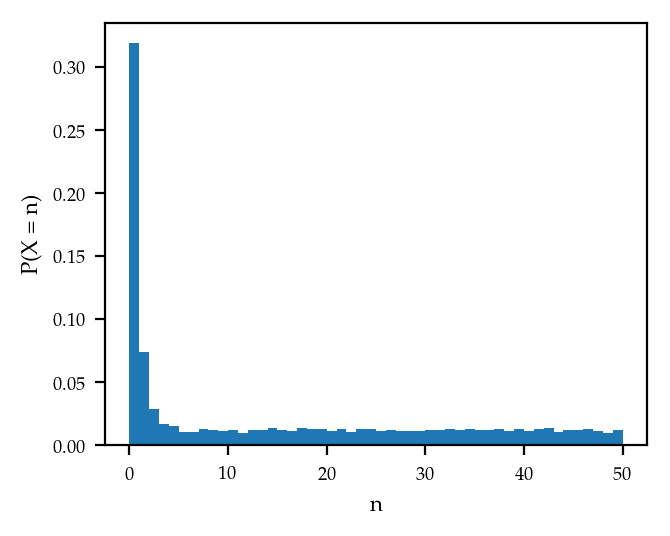

In [4]:
def run_monte_carlo_buying(N, K, n_trials):
    
    res = np.zeros(n_trials)
    for i in range(n_trials):
        
        Xs = np.arange(N)
        np.random.shuffle(Xs)
        X0 = np.min(Xs[:K])
        
        better_indices = np.nonzero(Xs[K:] < X0)[0] + K
        if len(better_indices) > 0:
            res[i] = Xs[better_indices[0]]
        else:
            res[i] = Xs[-1]
    
    return res

N = 50
K = 30

n_trials = 10**4
res = run_monte_carlo_buying(N, K, n_trials)

plt.hist(res, bins=np.arange(N+1), density=True)
plt.ylabel('P(X = n)')
plt.xlabel('n')
plt.show()

### Part 0.3.2

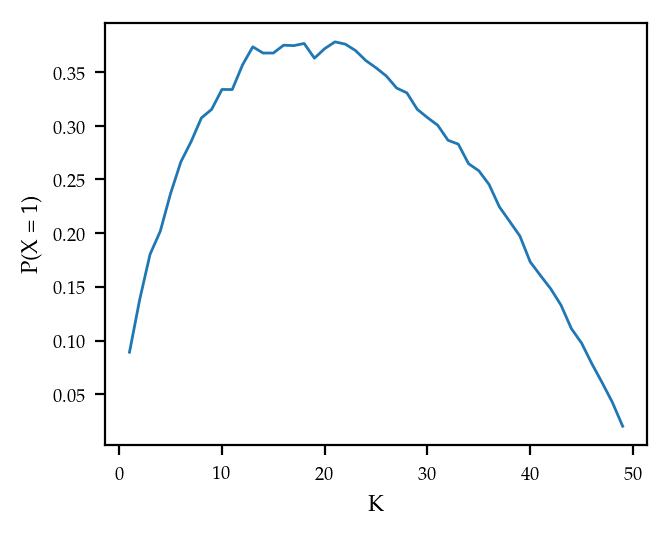

In [5]:
N = 50
K = 30
n_trials = 10**4

probs = np.zeros(N-1)
for k in range(1, N):
    probs[k - 1] = np.sum(run_monte_carlo_buying(N, k, n_trials) == 0) / n_trials

plt.plot(np.arange(1, N), probs)
plt.xlabel('K')
plt.ylabel('P(X = 1)')
plt.show()

### Part 0.3.3

Conditioned on the event $\{X_i=1\}$, the probability that $X = 1$ is the probability that none of the offers after the $K^{th}$ offer and before the $i^{th}$ offer were better than the best of the first $K$ offers. This is equivalently the probability that the best of the first $i-1$ offers was found among the first $K$. So $\gnewcommand{\argmin}{\operatorname{arg\,min}}$

\begin{align*}
    P(X=1 | X_i=1) &= P\left(\nexists j \in {K+1, \ldots, i-1} : X_j < \min_{\ell \in [K]} X_\ell \bigg{|} X_i = 1\right) \\
    &= P \left(\argmin_{\ell \in [i-1]} X_\ell \leq K \bigg{|} X_i = 1 \right) \\
    &= \frac{K}{i-1}
\end{align*}

when $i > K$ and $0$ otherwise. Using the law of total probability,

\begin{align*}
    P(X=1) &= \sum_{i=1}^N P(X=1|X_i=1) P(X_i=1) \\
    &= \sum_{i=K+1}^N \frac{K}{i-1} \frac{1}{N} \\
    &= \frac{K}{N} \sum_{i=K+1}^N \frac{1}{i-1}.
\end{align*}

### Part 0.3.4

Continuing from the previous problem, 

\begin{align*}
    P(X = 1) &= \frac{K}{N}\sum_{i=K+1}^{N} \frac{1}{i-1} \\
    &= \frac{K}{N}\sum_{i=K}^{N-1} \frac{1}{i} \\
    &= \frac{K}{N} (H_{N-1} - H_{K-1}) \\
    &\approx \frac{K}{N} \log \frac{N-1}{K-1} \\
    &\approx - \frac{K}{N} \log \frac{K}{N},
\end{align*}

where $H_n$ is the $n^{th}$ [harmonic number](https://en.wikipedia.org/wiki/Harmonic_number), and the approximations are increasingly good for large $K$ and $N$. The derivative of this probability with respect to $K/N$ is approximately $-\log K/N - 1$, so the probability is concave in $K/N$ and is maximized when $K/N \approx 1/e$, giving a probability of approximately $1/e$. The result is indeed remarkable, and even though the approximations are only good for large $K$ and $N$, based on the previous plots it seems that even somewhat small $K$ and $N$, such as $20$ and $50$, are large enough to realize this result.